In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
!pip install openml
import openml
import pandas as pd

# Load dataset from OpenML
dataset = openml.datasets.get_dataset(43672)
df, *_ = dataset.get_data()

# Show the first few rows of the dataset
df.head()

# Load dataset from OpenML
dataset = openml.datasets.get_dataset(43672)
df, *_ = dataset.get_data()

# Show the first few rows of the dataset
df.head()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.6 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=2fa84963d3c99c67469000bdf03a79aaa42ec098c8244bfe5a6f111e648fc1cf
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Check for missing values
df.isnull().sum()

# Fill missing values or drop rows/columns with missing data
df.fillna(df.mean(), inplace=True)

# Encode categorical variables using one-hot encoding or label encoding
df = pd.get_dummies(df, drop_first=True)

# Split features and labels
X = df.drop('target', axis=1)  # 'target' is assumed to be the label column
y = df['target']

# Normalize or standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Evaluate performance using accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8613445378151261
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix:
[[ 90  17]
 [ 16 115]]


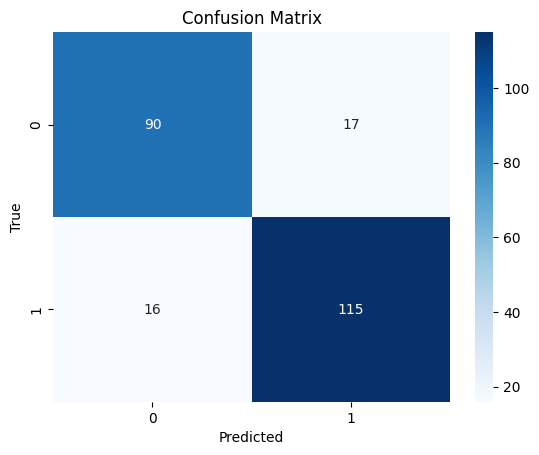

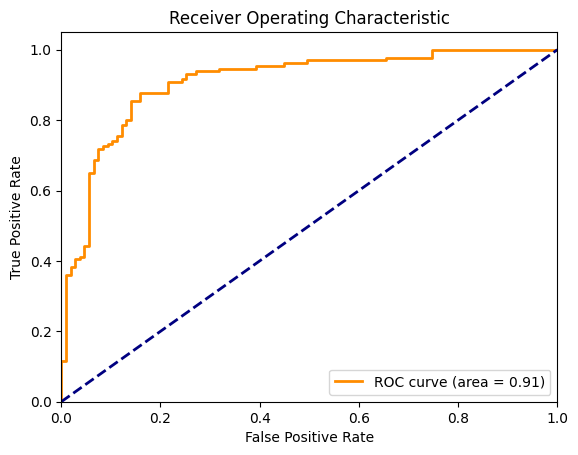

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print(f'Accuracy (SVM): {accuracy_score(y_test, y_pred_svm)}')


Accuracy (SVM): 0.8445378151260504


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}')


Accuracy (Random Forest): 0.9495798319327731


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

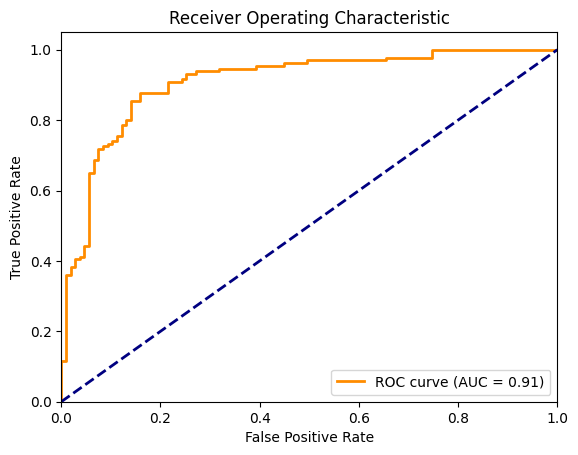

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


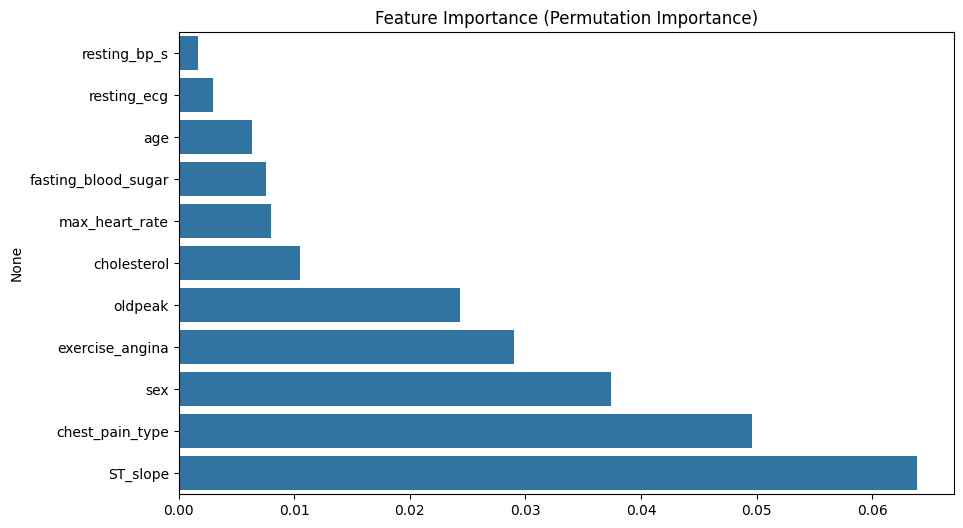

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance # Import for permutation importance


# Assuming 'model' is your LogisticRegression model
# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], orient='h') # Assuming 'X' is your feature data
plt.title('Feature Importance (Permutation Importance)')
plt.show()

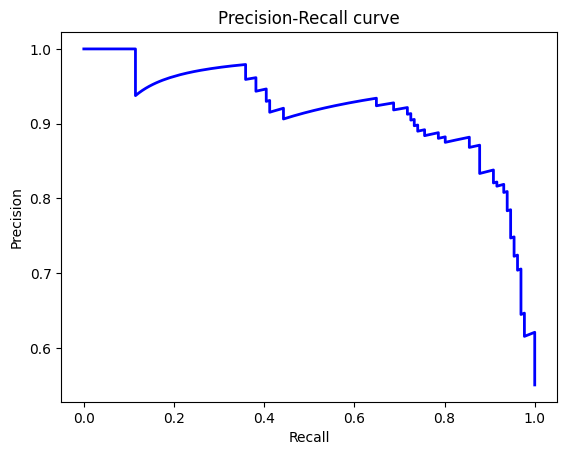

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()
